In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
sns.set(style="whitegrid", palette="pastel", color_codes=True)

In [35]:
df = pd.read_csv('../spotify.csv')

In [36]:
df.head()

,Unnamed: 0,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,target,tempo,time_signature,track_href,type,uri,valence
0,0,0.00887,https://api.spotify.com/v1/audio-analysis/6iaj...,0.706,225947,0.537,6iajHa34cSiD5s42Cq9miJ,0.000000,7,0.1290,-6.347,1,0.348,1,203.746,4,https://api.spotify.com/v1/tracks/6iajHa34cSiD...,audio_features,spotify:track:6iajHa34cSiD5s42Cq9miJ,0.775
1,1,0.10400,https://api.spotify.com/v1/audio-analysis/4oiA...,0.652,249960,0.621,4oiAlcisfimXQc1wyAtX9a,0.000005,9,0.0382,-8.677,0,0.263,1,169.983,4,https://api.spotify.com/v1/tracks/4oiAlcisfimX...,audio_features,spotify:track:4oiAlcisfimXQc1wyAtX9a,0.661
2,2,0.60300,https://api.spotify.com/v1/audio-analysis/3XVB...,0.609,228707,0.445,3XVBdLihbNbxUwZosxcGuJ,0.000007,7,0.1040,-9.129,1,0.106,1,118.393,3,https://api.spotify.com/v1/tracks/3XVBdLihbNbx...,audio_features,spotify:track:3XVBdLihbNbxUwZosxcGuJ,0.166
3,3,0.00182,https://api.spotify.com/v1/audio-analysis/0GLU...,0.593,273053,0.680,0GLUBbX4daHJkT3RQHEOia,0.000048,7,0.3100,-5.556,1,0.335,1,84.547,4,https://api.spotify.com/v1/tracks/0GLUBbX4daHJ...,audio_features,spotify:track:0GLUBbX4daHJkT3RQHEOia,0.483
4,4,0.38400,https://api.spotify.com/v1/audio-analysis/1yeL...,0.783,229800,0.758,1yeLSqz8u8ip9NnzjGs7lQ,0.000000,10,0.0938,-2.663,0,0.151,1,89.434,4,https://api.spotify.com/v1/tracks/1yeLSqz8u8ip...,audio_features,spotify:track:1yeLSqz8u8ip9NnzjGs7lQ,0.780


In [37]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [38]:
df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,target,tempo,time_signature,track_href,type,uri,valence
0,0.00887,https://api.spotify.com/v1/audio-analysis/6iaj...,0.706,225947,0.537,6iajHa34cSiD5s42Cq9miJ,0.000000,7,0.1290,-6.347,1,0.348,1,203.746,4,https://api.spotify.com/v1/tracks/6iajHa34cSiD...,audio_features,spotify:track:6iajHa34cSiD5s42Cq9miJ,0.775
1,0.10400,https://api.spotify.com/v1/audio-analysis/4oiA...,0.652,249960,0.621,4oiAlcisfimXQc1wyAtX9a,0.000005,9,0.0382,-8.677,0,0.263,1,169.983,4,https://api.spotify.com/v1/tracks/4oiAlcisfimX...,audio_features,spotify:track:4oiAlcisfimXQc1wyAtX9a,0.661
2,0.60300,https://api.spotify.com/v1/audio-analysis/3XVB...,0.609,228707,0.445,3XVBdLihbNbxUwZosxcGuJ,0.000007,7,0.1040,-9.129,1,0.106,1,118.393,3,https://api.spotify.com/v1/tracks/3XVBdLihbNbx...,audio_features,spotify:track:3XVBdLihbNbxUwZosxcGuJ,0.166
3,0.00182,https://api.spotify.com/v1/audio-analysis/0GLU...,0.593,273053,0.680,0GLUBbX4daHJkT3RQHEOia,0.000048,7,0.3100,-5.556,1,0.335,1,84.547,4,https://api.spotify.com/v1/tracks/0GLUBbX4daHJ...,audio_features,spotify:track:0GLUBbX4daHJkT3RQHEOia,0.483
4,0.38400,https://api.spotify.com/v1/audio-analysis/1yeL...,0.783,229800,0.758,1yeLSqz8u8ip9NnzjGs7lQ,0.000000,10,0.0938,-2.663,0,0.151,1,89.434,4,https://api.spotify.com/v1/tracks/1yeLSqz8u8ip...,audio_features,spotify:track:1yeLSqz8u8ip9NnzjGs7lQ,0.780


In [39]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,target,tempo,time_signature,valence
count,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000
mean,0.134158,0.692287,241928.696406,0.680727,0.008604,5.187113,0.178328,-5.831706,0.529740,0.162797,0.519207,118.509256,4.010533,0.619157
std,0.159202,0.151994,42698.391753,0.138280,0.060943,3.591121,0.146241,1.849283,0.499269,0.118074,0.499786,32.837524,0.271412,0.193113
min,0.000007,0.082500,142444.000000,0.207000,0.000000,0.000000,0.022400,-14.549000,0.000000,0.025900,0.000000,60.048000,1.000000,0.051400
25%,0.017500,0.593000,214560.000000,0.589000,0.000000,1.000000,0.080100,-6.871000,0.000000,0.061400,0.000000,93.211000,4.000000,0.483500
50%,0.071000,0.714000,237800.000000,0.682000,0.000000,5.000000,0.118000,-5.731000,1.000000,0.134000,1.000000,106.328000,4.000000,0.628500
75%,0.207000,0.811000,264760.000000,0.781000,0.000012,8.000000,0.244750,-4.640000,1.000000,0.247000,1.000000,140.012000,4.000000,0.766000
max,0.839000,0.966000,625173.000000,0.991000,0.779000,11.000000,0.949000,-1.268000,1.000000,0.576000,1.000000,209.819000,5.000000,0.972000


In [40]:
liked = df[df.target==1]

In [41]:
liked.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,target,tempo,time_signature,valence
count,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.0,838.000000,838.000000,838.000000
mean,0.137223,0.697989,243182.437947,0.679733,0.007851,5.225537,0.178184,-5.830499,0.532220,0.166117,1.0,117.691990,4.010740,0.623978
std,0.158674,0.149254,42189.124549,0.137276,0.057763,3.601801,0.146626,1.840603,0.499259,0.118349,0.0,32.756439,0.265282,0.191809
min,0.000007,0.082500,142444.000000,0.207000,0.000000,0.000000,0.022400,-14.549000,0.000000,0.025900,1.0,60.048000,1.000000,0.051400
25%,0.020125,0.603250,215226.250000,0.588250,0.000000,1.000000,0.079400,-6.869000,0.000000,0.062800,1.0,93.118000,4.000000,0.493000
50%,0.074350,0.717000,238800.000000,0.682000,0.000000,5.000000,0.118000,-5.729500,1.000000,0.138000,1.0,105.412000,4.000000,0.635000
75%,0.217250,0.813750,265456.500000,0.777250,0.000011,8.000000,0.243000,-4.642500,1.000000,0.252750,1.0,139.693500,4.000000,0.769000
max,0.839000,0.966000,625173.000000,0.991000,0.779000,11.000000,0.949000,-1.268000,1.000000,0.576000,1.0,209.819000,5.000000,0.972000


Looking at the range of values in these attributes, an initial hypothesis is that I'm more likely to enjoy songs that are upbeat.

In [42]:
df['target'].value_counts()

1    838
0    776
Name: target, dtype: int64

In [43]:
df.isnull().sum()

acousticness        0
analysis_url        0
danceability        0
duration_ms         0
energy              0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
target              0
tempo               0
time_signature      0
track_href          0
type                0
uri                 0
valence             0
dtype: int64

In [44]:
df.columns

Index(['acousticness', 'analysis_url', 'danceability', 'duration_ms', 'energy',
       'id', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'target', 'tempo', 'time_signature', 'track_href',
       'type', 'uri', 'valence'],
      dtype='object')

In [45]:
cols = ['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness',
       'speechiness', 'target', 'tempo', 'time_signature','valence']

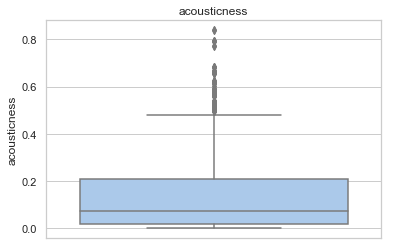

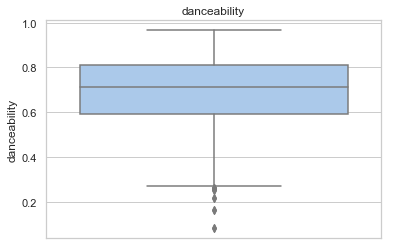

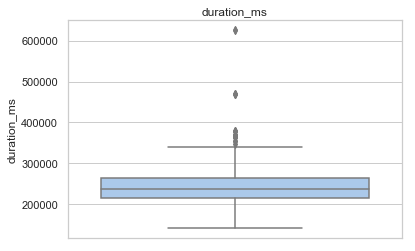

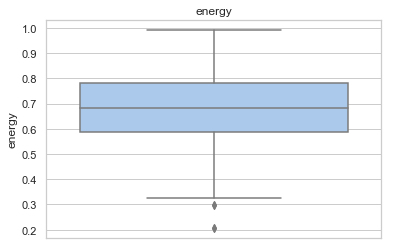

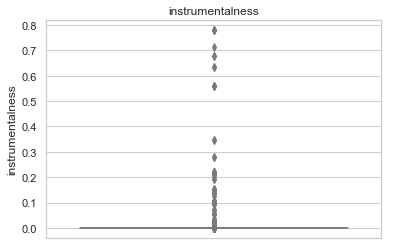

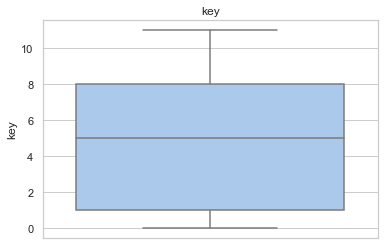

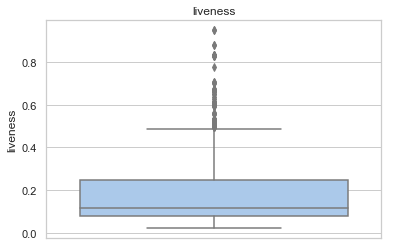

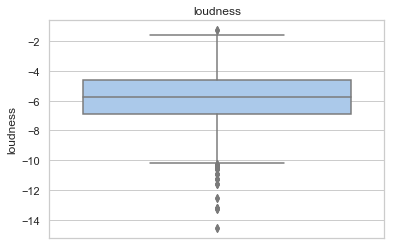

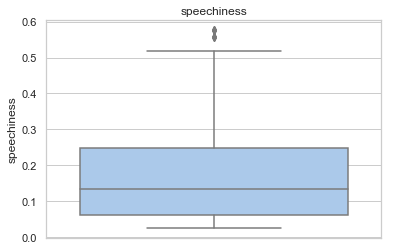

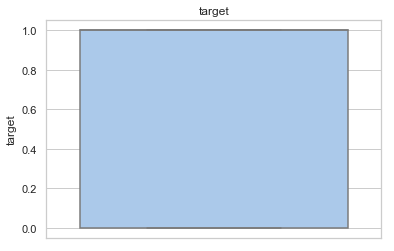

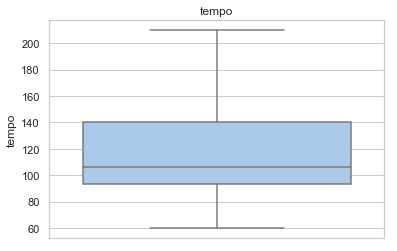

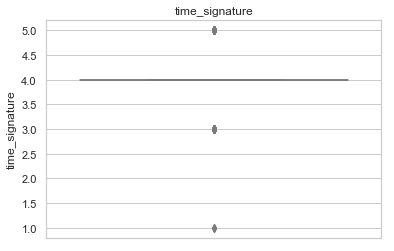

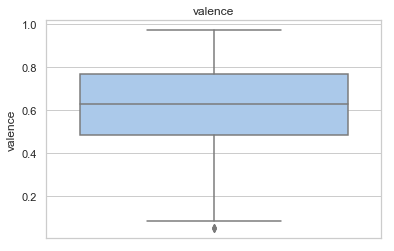

In [46]:
for c in cols:
    sns.boxplot(y=df[c], color = 'b')
    plt.title(c)
    plt.show()

For the sake of the model, we will utilize the attributes with little to no outliers

In [47]:
df.drop(['time_signature','instrumentalness'],axis=1,inplace=True)

In [48]:
df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,key,liveness,loudness,mode,speechiness,target,tempo,track_href,type,uri,valence
0,0.00887,https://api.spotify.com/v1/audio-analysis/6iaj...,0.706,225947,0.537,6iajHa34cSiD5s42Cq9miJ,7,0.1290,-6.347,1,0.348,1,203.746,https://api.spotify.com/v1/tracks/6iajHa34cSiD...,audio_features,spotify:track:6iajHa34cSiD5s42Cq9miJ,0.775
1,0.10400,https://api.spotify.com/v1/audio-analysis/4oiA...,0.652,249960,0.621,4oiAlcisfimXQc1wyAtX9a,9,0.0382,-8.677,0,0.263,1,169.983,https://api.spotify.com/v1/tracks/4oiAlcisfimX...,audio_features,spotify:track:4oiAlcisfimXQc1wyAtX9a,0.661
2,0.60300,https://api.spotify.com/v1/audio-analysis/3XVB...,0.609,228707,0.445,3XVBdLihbNbxUwZosxcGuJ,7,0.1040,-9.129,1,0.106,1,118.393,https://api.spotify.com/v1/tracks/3XVBdLihbNbx...,audio_features,spotify:track:3XVBdLihbNbxUwZosxcGuJ,0.166
3,0.00182,https://api.spotify.com/v1/audio-analysis/0GLU...,0.593,273053,0.680,0GLUBbX4daHJkT3RQHEOia,7,0.3100,-5.556,1,0.335,1,84.547,https://api.spotify.com/v1/tracks/0GLUBbX4daHJ...,audio_features,spotify:track:0GLUBbX4daHJkT3RQHEOia,0.483
4,0.38400,https://api.spotify.com/v1/audio-analysis/1yeL...,0.783,229800,0.758,1yeLSqz8u8ip9NnzjGs7lQ,10,0.0938,-2.663,0,0.151,1,89.434,https://api.spotify.com/v1/tracks/1yeLSqz8u8ip...,audio_features,spotify:track:1yeLSqz8u8ip9NnzjGs7lQ,0.780


Normality

In [49]:
cols = ['acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'key',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence']

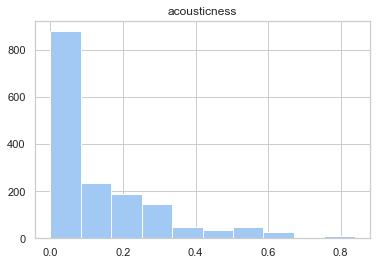

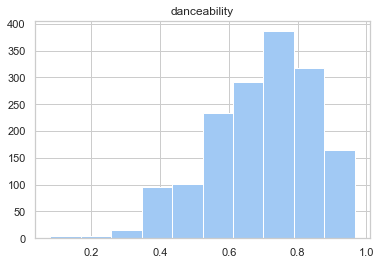

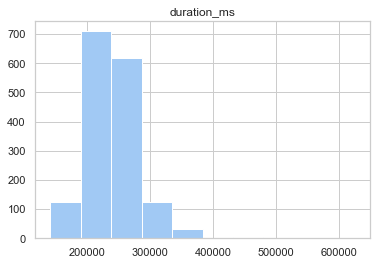

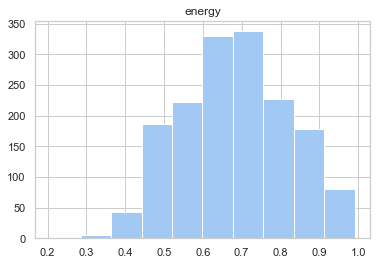

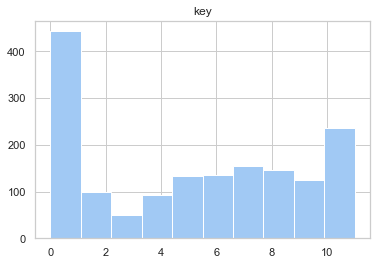

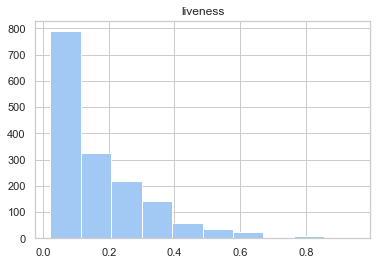

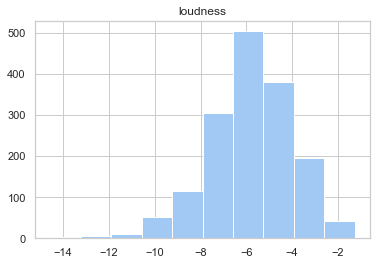

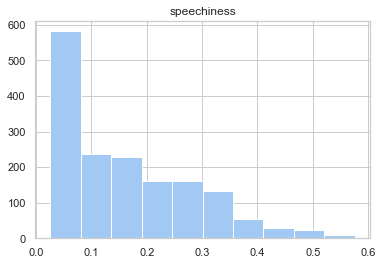

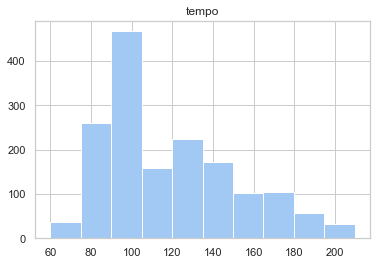

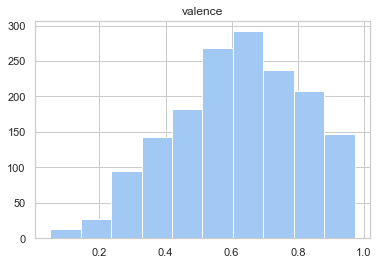

In [50]:
for c in cols:
    fig, ax = plt.subplots()
    ax.hist(df[c],bins=10)
    ax.set_title(c)
    plt.show()

Based on the histograms, we will use the columns with normal distributions for our model (for simplicity)

In [51]:
df.drop(['speechiness','liveness','key','acousticness'], axis=1,inplace=True)

In [52]:
df.head()

,analysis_url,danceability,duration_ms,energy,id,loudness,mode,target,tempo,track_href,type,uri,valence
0,https://api.spotify.com/v1/audio-analysis/6iaj...,0.706,225947,0.537,6iajHa34cSiD5s42Cq9miJ,-6.347,1,1,203.746,https://api.spotify.com/v1/tracks/6iajHa34cSiD...,audio_features,spotify:track:6iajHa34cSiD5s42Cq9miJ,0.775
1,https://api.spotify.com/v1/audio-analysis/4oiA...,0.652,249960,0.621,4oiAlcisfimXQc1wyAtX9a,-8.677,0,1,169.983,https://api.spotify.com/v1/tracks/4oiAlcisfimX...,audio_features,spotify:track:4oiAlcisfimXQc1wyAtX9a,0.661
2,https://api.spotify.com/v1/audio-analysis/3XVB...,0.609,228707,0.445,3XVBdLihbNbxUwZosxcGuJ,-9.129,1,1,118.393,https://api.spotify.com/v1/tracks/3XVBdLihbNbx...,audio_features,spotify:track:3XVBdLihbNbxUwZosxcGuJ,0.166
3,https://api.spotify.com/v1/audio-analysis/0GLU...,0.593,273053,0.680,0GLUBbX4daHJkT3RQHEOia,-5.556,1,1,84.547,https://api.spotify.com/v1/tracks/0GLUBbX4daHJ...,audio_features,spotify:track:0GLUBbX4daHJkT3RQHEOia,0.483
4,https://api.spotify.com/v1/audio-analysis/1yeL...,0.783,229800,0.758,1yeLSqz8u8ip9NnzjGs7lQ,-2.663,0,1,89.434,https://api.spotify.com/v1/tracks/1yeLSqz8u8ip...,audio_features,spotify:track:1yeLSqz8u8ip9NnzjGs7lQ,0.780


We will drop the unnecessary columns:

In [53]:
df.drop(['type','uri','track_href','analysis_url',],axis=1,inplace=True)

In [54]:
df.head()

,danceability,duration_ms,energy,id,loudness,mode,target,tempo,valence
0,0.706,225947,0.537,6iajHa34cSiD5s42Cq9miJ,-6.347,1,1,203.746,0.775
1,0.652,249960,0.621,4oiAlcisfimXQc1wyAtX9a,-8.677,0,1,169.983,0.661
2,0.609,228707,0.445,3XVBdLihbNbxUwZosxcGuJ,-9.129,1,1,118.393,0.166
3,0.593,273053,0.680,0GLUBbX4daHJkT3RQHEOia,-5.556,1,1,84.547,0.483
4,0.783,229800,0.758,1yeLSqz8u8ip9NnzjGs7lQ,-2.663,0,1,89.434,0.780


Lastly, drop the song id:

In [55]:
df.drop(['id'],axis=1,inplace=True)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

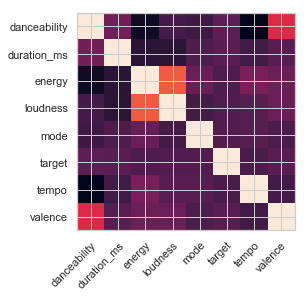

In [32]:
corr = df.corr()
fig, ax = plt.subplots()
# create heatmap
im = ax.imshow(corr.values)

ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

In [56]:
df.head()

,danceability,duration_ms,energy,loudness,mode,target,tempo,valence
0,0.706,225947,0.537,-6.347,1,1,203.746,0.775
1,0.652,249960,0.621,-8.677,0,1,169.983,0.661
2,0.609,228707,0.445,-9.129,1,1,118.393,0.166
3,0.593,273053,0.680,-5.556,1,1,84.547,0.483
4,0.783,229800,0.758,-2.663,0,1,89.434,0.780


In [57]:
df = df.to_csv(r'sitaraabraham\Documents\Springboard\Capstone #2\spotify_cleaned.csv')